# Predicting Houses Prices in the Boston Area

In this notebook we will use the popular Boston Housing Dataset and apply a linear regression as well as some validation tests on our regression results.



In [267]:
# import libraries
from sklearn.datasets import load_boston # dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import statsmodels.formula.api as sm
from sklearn import linear_model

%matplotlib inline

In [268]:
# instantiate dataset and create DataFrame 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])


In [269]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [270]:
# Basic exploratory analyses 
print("Rows,Columns:",df.shape)
df.describe()

Rows,Columns: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [271]:
# count missing values
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [272]:
# split dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.30)


In [273]:
# Fitting using stats model
model_1 = smf.OLS(Y_train,X_train).fit()
prediction_1 = model_1.predict(X_train) # predict y_train values
prediction_2 = model_1.predict(X_test)# predict y_test values 

In [274]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     734.5
Date:                Thu, 05 Oct 2017   Prob (F-statistic):          2.74e-240
Time:                        18:28:26   Log-Likelihood:                -1031.6
No. Observations:                 354   AIC:                             2089.
Df Residuals:                     341   BIC:                             2139.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1208      0.039     -3.122      0.002      -0.197      -0.045
ZN             0.0495      0.016      3.142      0.002       0.019       0.081
INDUS          0.0313      0.069      0.455      0.650      -0.104       0.167
CHAS           2.6447      0.999      2.646      0.009       0.679       4.611
NOX           -8.7498      3.795     -2.305      0.022     -16.215      -1.285
RM             6.7493      0.349     19.313      0.000       6.062       7.437
AGE           -0.0092      0.015     -0.603      0.547      -0.039       0.021
DIS           -1.0861      0.215     -5.046      0.000      -1.509      -0.663
RAD            0.1297      0.071      1.815      0.070      -0.011       0.270
TAX           -0.0081      0.004     -1.962      0.051      -0.016    2.04e-05
PTRATIO       -0.5884      0.124     -4.734      0.000      -0.833      -0.344
B              0.0162      0.003      5.490      0.000       0.010       0.022
LSTAT         -0.3189      0.061     -5.268      0.000      -0.438      -0.200
==============================================================================
Omnibus:                      124.358   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              924.657
Skew:                           1.262   Prob(JB):                    1.63e-201
Kurtosis:                      10.505   Cond. No.                     8.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Looking at the Summary

In the summary we see some interesting results. The INDUS coefficient (proportion of non-retail business acres per town) is not nearly statistically significant at the 5% or 10% level. The same goes for the AGE and NOX variables. 

There seems to be no autocorrelation (as expected as this is not a time-series problem). 

Overall, the Adjusted R^2 score is great, but how about RMSE (root mean square error), lets have a look. 

In [275]:
rmse_training = sqrt(mean_squared_error(Y_train, prediction_1))
print("RMSE for training data:", rmse_training)
rmse_test = sqrt(mean_squared_error(Y_test,prediction_2))
print("RMSE for test data:", rmse_test)

RMSE for training data: 4.459982700887825
RMSE for test data: 6.059020669053433


Hmm...  The RMSE for the test data is quite low and very close to that of the training data.  But can we do better?! Lets try by doing a correlation test to identify spurious variables.

In [276]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.231618,CRIM
1,2.511866,ZN
2,17.406197,INDUS
3,1.166184,CHAS
4,72.391370,NOX
5,80.414370,RM
6,25.537058,AGE
7,15.226339,DIS
8,16.615485,RAD
9,74.680713,TAX


There is no hard and fast rules on VIF factors, while a score above 10 is undesirable as it suggests very correlation that artificially inflates our R score, a subjective call must be taken depending on the problem. For example, while the TAX variable (full-value property-tax rate per 10,000 dollars) is highly correlated with the rest of the variables, it is too important of a variable to ignore, plus it is very significant at the 5% level. 

NOX and INDUS on the other hand, we can try and remove and see if we get a better model.
Let's re-create our training sets.



In [278]:
#create second training set
#df = df.drop(["NOX","INDUS"], axis = 1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df, target, test_size=0.30)
print(df.shape)
print(X_test1.shape)

(506, 11)
(152, 11)


In [286]:
# fit second model
model_2 = smf.OLS(Y_train1,X_train1).fit()
prediction_3 = model_2.predict(X_train1)# predict y_test values
prediction_4 = model_2.predict(X_test1)# predict y_test values 

In [287]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     765.1
Date:                Thu, 05 Oct 2017   Prob (F-statistic):          9.06e-234
Time:                        18:32:47   Log-Likelihood:                -1053.1
No. Observations:                 354   AIC:                             2128.
Df Residuals:                     343   BIC:                             2171.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1273      0.038     -3.318      0.001      -0.203      -0.052
ZN             0.0601      0.017      3.614      0.000       0.027       0.093
CHAS           2.4752      0.996      2.485      0.013       0.516       4.435
RM             5.5777      0.311     17.956      0.000       4.967       6.189
AGE            0.0003      0.016      0.021      0.983      -0.030       0.031
DIS           -0.8542      0.212     -4.030      0.000      -1.271      -0.437
RAD            0.1758      0.072      2.446      0.015       0.034       0.317
TAX           -0.0112      0.004     -2.980      0.003      -0.019      -0.004
PTRATIO       -0.4047      0.125     -3.247      0.001      -0.650      -0.160
B              0.0163      0.003      5.118      0.000       0.010       0.023
LSTAT         -0.4200      0.056     -7.555      0.000      -0.529      -0.311
==============================================================================
Omnibus:                      138.371   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.746
Skew:                           1.501   Prob(JB):                    8.31e-190
Kurtosis:                      10.072   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [288]:
rmse_training_2 = sqrt(mean_squared_error(Y_train1, prediction_3))
print("RMSE for training data:", rmse_training)
rmse_test_2 = sqrt(mean_squared_error(Y_test1,prediction_4))
print("RMSE for test data:", rmse_test)

RMSE for training data: 4.459982700887825
RMSE for test data: 6.059020669053433


In [189]:
lm = linear_model.LinearRegression()
model_2 = lm.fit(X_train,Y_train)

In [190]:
prediction_2 = lm.predict(X_test)
print(len(X_test))

167


In [191]:
print(prediction_2)
print(len(prediction_2))

[[ 24.93101064]
 [ 29.52566742]
 [ 23.28927759]
 [ 24.86474122]
 [ 17.18109593]
 [ 23.93953384]
 [ 15.73549876]
 [ 21.88206282]
 [ 15.77205129]
 [ 29.06148497]
 [ 32.52231388]
 [ 22.56740932]
 [  1.60320867]
 [ 39.00231523]
 [ 26.12719255]
 [ 18.22103353]
 [ 13.06823989]
 [ 30.70157051]
 [ 26.7870631 ]
 [ 37.80196742]
 [ 33.18831139]
 [ 27.10456909]
 [ 32.7730165 ]
 [ 24.71090862]
 [ 28.01924685]
 [ 35.77140321]
 [ 27.06213037]
 [ 21.33265029]
 [ 32.83470147]
 [ 20.77433682]
 [  9.28279042]
 [  0.80637391]
 [ 13.89853271]
 [ 20.39609319]
 [ 30.7861978 ]
 [ 32.87643599]
 [ 19.38656497]
 [ 20.27290692]
 [ 37.03600825]
 [ 16.33424276]
 [ 34.46325352]
 [ 26.80945427]
 [ 19.21311236]
 [  5.74423457]
 [ 19.54542228]
 [ 34.13714117]
 [ 42.57848429]
 [ 12.31451876]
 [ 39.99039672]
 [ 21.92648157]
 [ 21.6803994 ]
 [ 16.10590152]
 [ 14.72540036]
 [ 24.49987889]
 [  8.90829631]
 [ 19.670386  ]
 [  5.29485335]
 [ 22.69172355]
 [ 20.26629712]
 [ 11.25330515]
 [ 24.44917333]
 [ 14.07438618]
 [ 25.89

In [117]:

rms = sqrt(mean_squared_error(Y_test, prediction_2))
print("RMSE_test:",rms)
rms_1 = sqrt(mean_squared_error(Y_train,prediction_1))
print("RMSE_train:",rms_1)

RMSE_test: 5.33182748129862
RMSE_train: 4.631271759950048


[[  2.90024038]
 [ -2.74778897]
 [  4.44702108]
 [ -1.01034046]
 [  1.35702304]
 [ -2.73866117]
 [ -1.91675234]
 [  2.51670708]
 [ 24.93215238]
 [  2.83268166]
 [ -5.45369573]
 [-10.46215808]
 [ -3.59466484]
 [ -1.17765221]
 [  0.55055327]
 [ -4.88614364]
 [  2.60252099]
 [  1.16675699]
 [ -0.2379838 ]
 [ -1.13691677]
 [ -1.91023729]
 [ -1.08386836]
 [ -6.81738937]
 [  5.53531495]
 [ -0.1219255 ]
 [  3.71422041]
 [ -2.62655246]
 [  2.60069759]
 [ -6.16821515]
 [ 15.77935196]
 [ -1.9339368 ]
 [  9.84628258]
 [-17.71175025]
 [ -1.42402499]
 [ -4.25392835]
 [  1.11320551]
 [ -1.82747898]
 [ 11.13423043]
 [ -7.29084672]
 [ -3.56070318]
 [  0.31564998]
 [  3.89398976]
 [  3.86004092]
 [  2.26195659]
 [ -5.71266475]
 [  1.13554286]
 [ -2.3787463 ]
 [ -0.32646067]
 [  0.88896207]
 [  0.2785366 ]
 [  0.9292323 ]
 [ -4.6715069 ]
 [ -3.5076354 ]
 [ -2.16909823]
 [ -1.87710621]
 [ -1.37610767]
 [  6.97058255]
 [  0.23036737]
 [  6.91000535]
 [  0.86460235]
 [ -2.44652064]
 [ -2.61639307]
 [  3.63

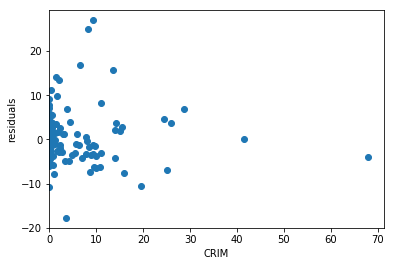

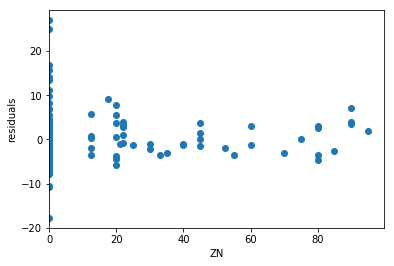

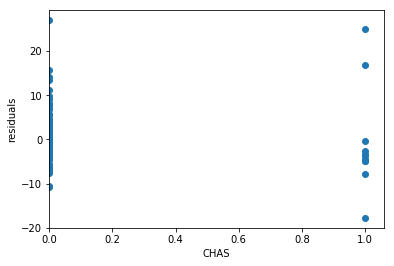

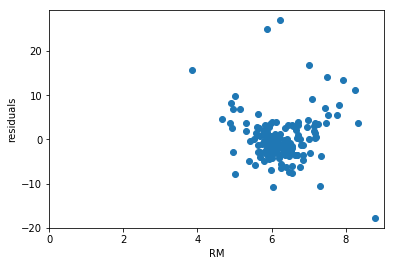

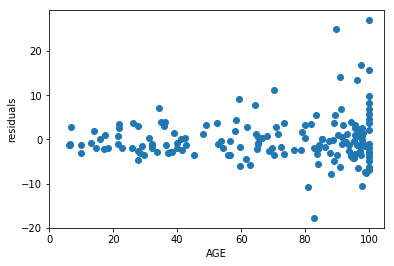

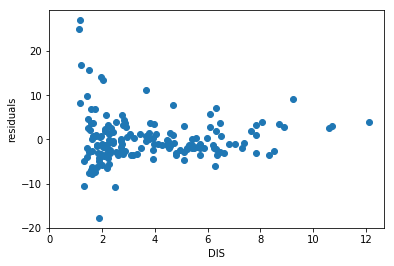

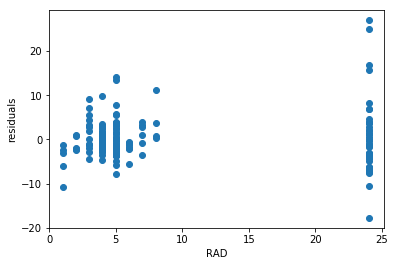

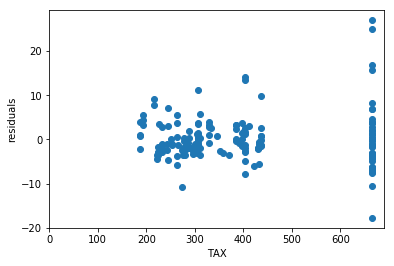

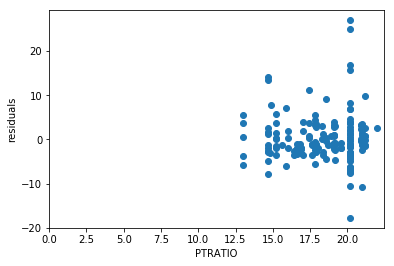

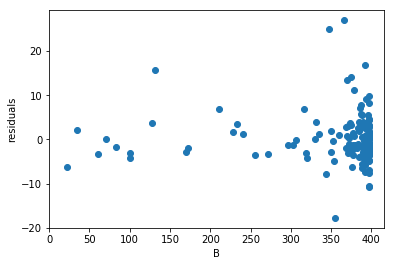

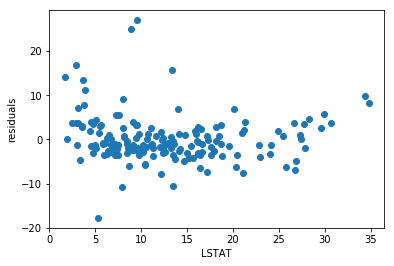

In [133]:
residual = Y_test.values-prediction_2
print(residual)
for i in X_test:
    plt.scatter(X_test[i],residual)
    plt.xlim(0,)
    plt.xlabel(i)
    plt.ylabel("residuals")
    plt.show()

In [120]:
vif

,VIF Factor,features
0,2.495032,CRIM
1,2.446779,ZN
2,1.162942,CHAS
3,68.307321,RM
4,22.786796,AGE
5,12.665816,DIS
6,16.738498,RAD
7,51.081136,TAX
8,71.515551,PTRATIO
9,25.781496,B


In [130]:
name = [ 'p-value']
test = sms.het_breushpagan(model_1.resid, model_1.model.exog)
lzip(name, test)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('p-value', 59.611040782255223)]